# **Trabalho NLP**

**Aluno:** Filipe Faria Rodrigues

**Matrícula:** 211.101.222

**Professor:** Leonardo Mendoza

# Processamento Inicial

### Importando as bibliotecas

In [1]:
#Importa as bibliotecas necessárias
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Leitura da base de reclamações

In [2]:
#Leitura do arquivo contendo a base de reclamações
data = pd.read_csv('base reclamações.csv',encoding='windows-1252',sep =';')
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


### Quantidade de linhas e de colunas do dataframe lido

In [5]:
print(f'Linhas: {data.shape[0]} / Colunas: {data.shape[1]}')

Linhas: 42307 / Colunas: 8


## Colunas da tabela

In [6]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

### Localização das colunas com valores "null"

In [7]:
#Exibição da quantidade de valores "null" em cada coluna
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

# Tratamento das colunas desejadas (empresas, estados e serviços)

### Separação das colunas desejadas

In [8]:
#criando os dataframes
df_empresa = pd.DataFrame()
df_estado = pd.DataFrame()
df_servico = pd.DataFrame()

df_empresa['empresa'] = data['empresa']
df_estado['estado'] = data['estado']
df_servico['serviço'] = data['serviço']

In [9]:
df_empresa.head()

,empresa
0,ITAÚ UNIBANCO S/A
1,CLARO S/A
2,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO
3,GNN GARAGENS LTDA - EPP
4,CLARO S/A


In [10]:
df_estado.head()

,estado
0,SP
1,SP
2,SP
3,SP
4,SP


In [11]:
df_servico.head(15)

,serviço
0,Outros Contratos
1,Telefonia Fixa ( Plano de Expansão / Compra e ...
2,Energia Elétrica
3,"Estacionamento ( Particular, Supermercado, Sho..."
4,Telefonia Fixa ( Plano de Expansão / Compra e ...
5,Agências e Operadoras de viagens (pacotes turí...
6,Artigos de Enxoval ( Cama / Mesa e Banho )
7,Telefonia Fixa ( Plano de Expansão / Compra e ...
8,Academia de Ginástica / Natação / Esportes
9,"Oficinas ( Mecânica, Funilaria, Auto-Elétrica,..."


### Verificando se há algum "null"

In [12]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

In [13]:
df_estado.isnull().sum()

estado    0
dtype: int64

In [14]:
df_servico.isnull().sum()

serviço    0
dtype: int64

### Removendo os "nulls" encontrados

In [15]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

In [16]:
df_estado.dropna(inplace=True)
df_estado.isnull().sum()

estado    0
dtype: int64

In [17]:
df_servico.dropna(inplace=True)
df_servico.isnull().sum()

serviço    0
dtype: int64

### Substitui:

#### " " por "_" (espaço)

#### "/" por "" 

#### "," por "" 

#### "(" por "" 

#### ")" por "" 

#### "-" por ""

#### "." por ""

#### "\t" por "" (tab)

### para o wordcloud funcionar

In [18]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)
df_estado["Nome Estado Sem Espaço"] = df_estado.replace({'estado': dicionario},regex=True)
df_servico["Nome Serviço Sem Espaço"] = df_servico.replace({'serviço': dicionario},regex=True)

### Convertendo para letras minúsculas

In [19]:
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()
df_estado["Nome Estado Sem Espaço"] = df_estado["Nome Estado Sem Espaço"].str.lower()
df_servico["Nome Serviço Sem Espaço"] = df_servico["Nome Serviço Sem Espaço"].str.lower()

### Apreciação inicial do que foi obtido

In [20]:
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
flynt_consultoria_comercial__eireli                      1
fls_educacional_consultoria_e_assessoria_em_inform       1
flp_comercial_de_medicamentos_ltda_me                    1
florismagno_dos_santos_cerqueira__me                     1
única_brasilia_automoveis_ltda_smaff_ford                1
Length: 10607, dtype: int64


In [21]:
print (df_estado.groupby("Nome Estado Sem Espaço").size().sort_values(ascending=False))

Nome Estado Sem Espaço
sp    8127
go    7764
ms    4723
rn    4073
mt    3972
mg    3460
pi    2153
ro    2057
sc    1955
ce    1766
es     828
to     567
pa     341
pb     302
ma     126
rs      90
pe       3
dtype: int64


In [22]:
print (df_servico.groupby("Nome Serviço Sem Espaço").size().sort_values(ascending=False))

Nome Serviço Sem Espaço
telefone__convencional_celular_interfone_etc_                                                                        5149
telefonia_celular                                                                                                    3037
telefonia_fixa__plano_de_expansão__compra_e_venda__locação_                                                          2713
banco_comercial                                                                                                      2313
cartão_de_crédito                                                                                                    2274
                                                                                                                     ... 
profissional_liberal__veterinário                                                                                       1
charutaria__cigarro_tabaco_cachimbo_etc_                                                                                1


### Criação de uma string única com todas as ocorrências

In [23]:
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])
string_estados = " ".join([text for text in df_estado["Nome Estado Sem Espaço"]])
string_servicos = " ".join([text for text in df_servico["Nome Serviço Sem Espaço"]])

Wordcloud Empresas

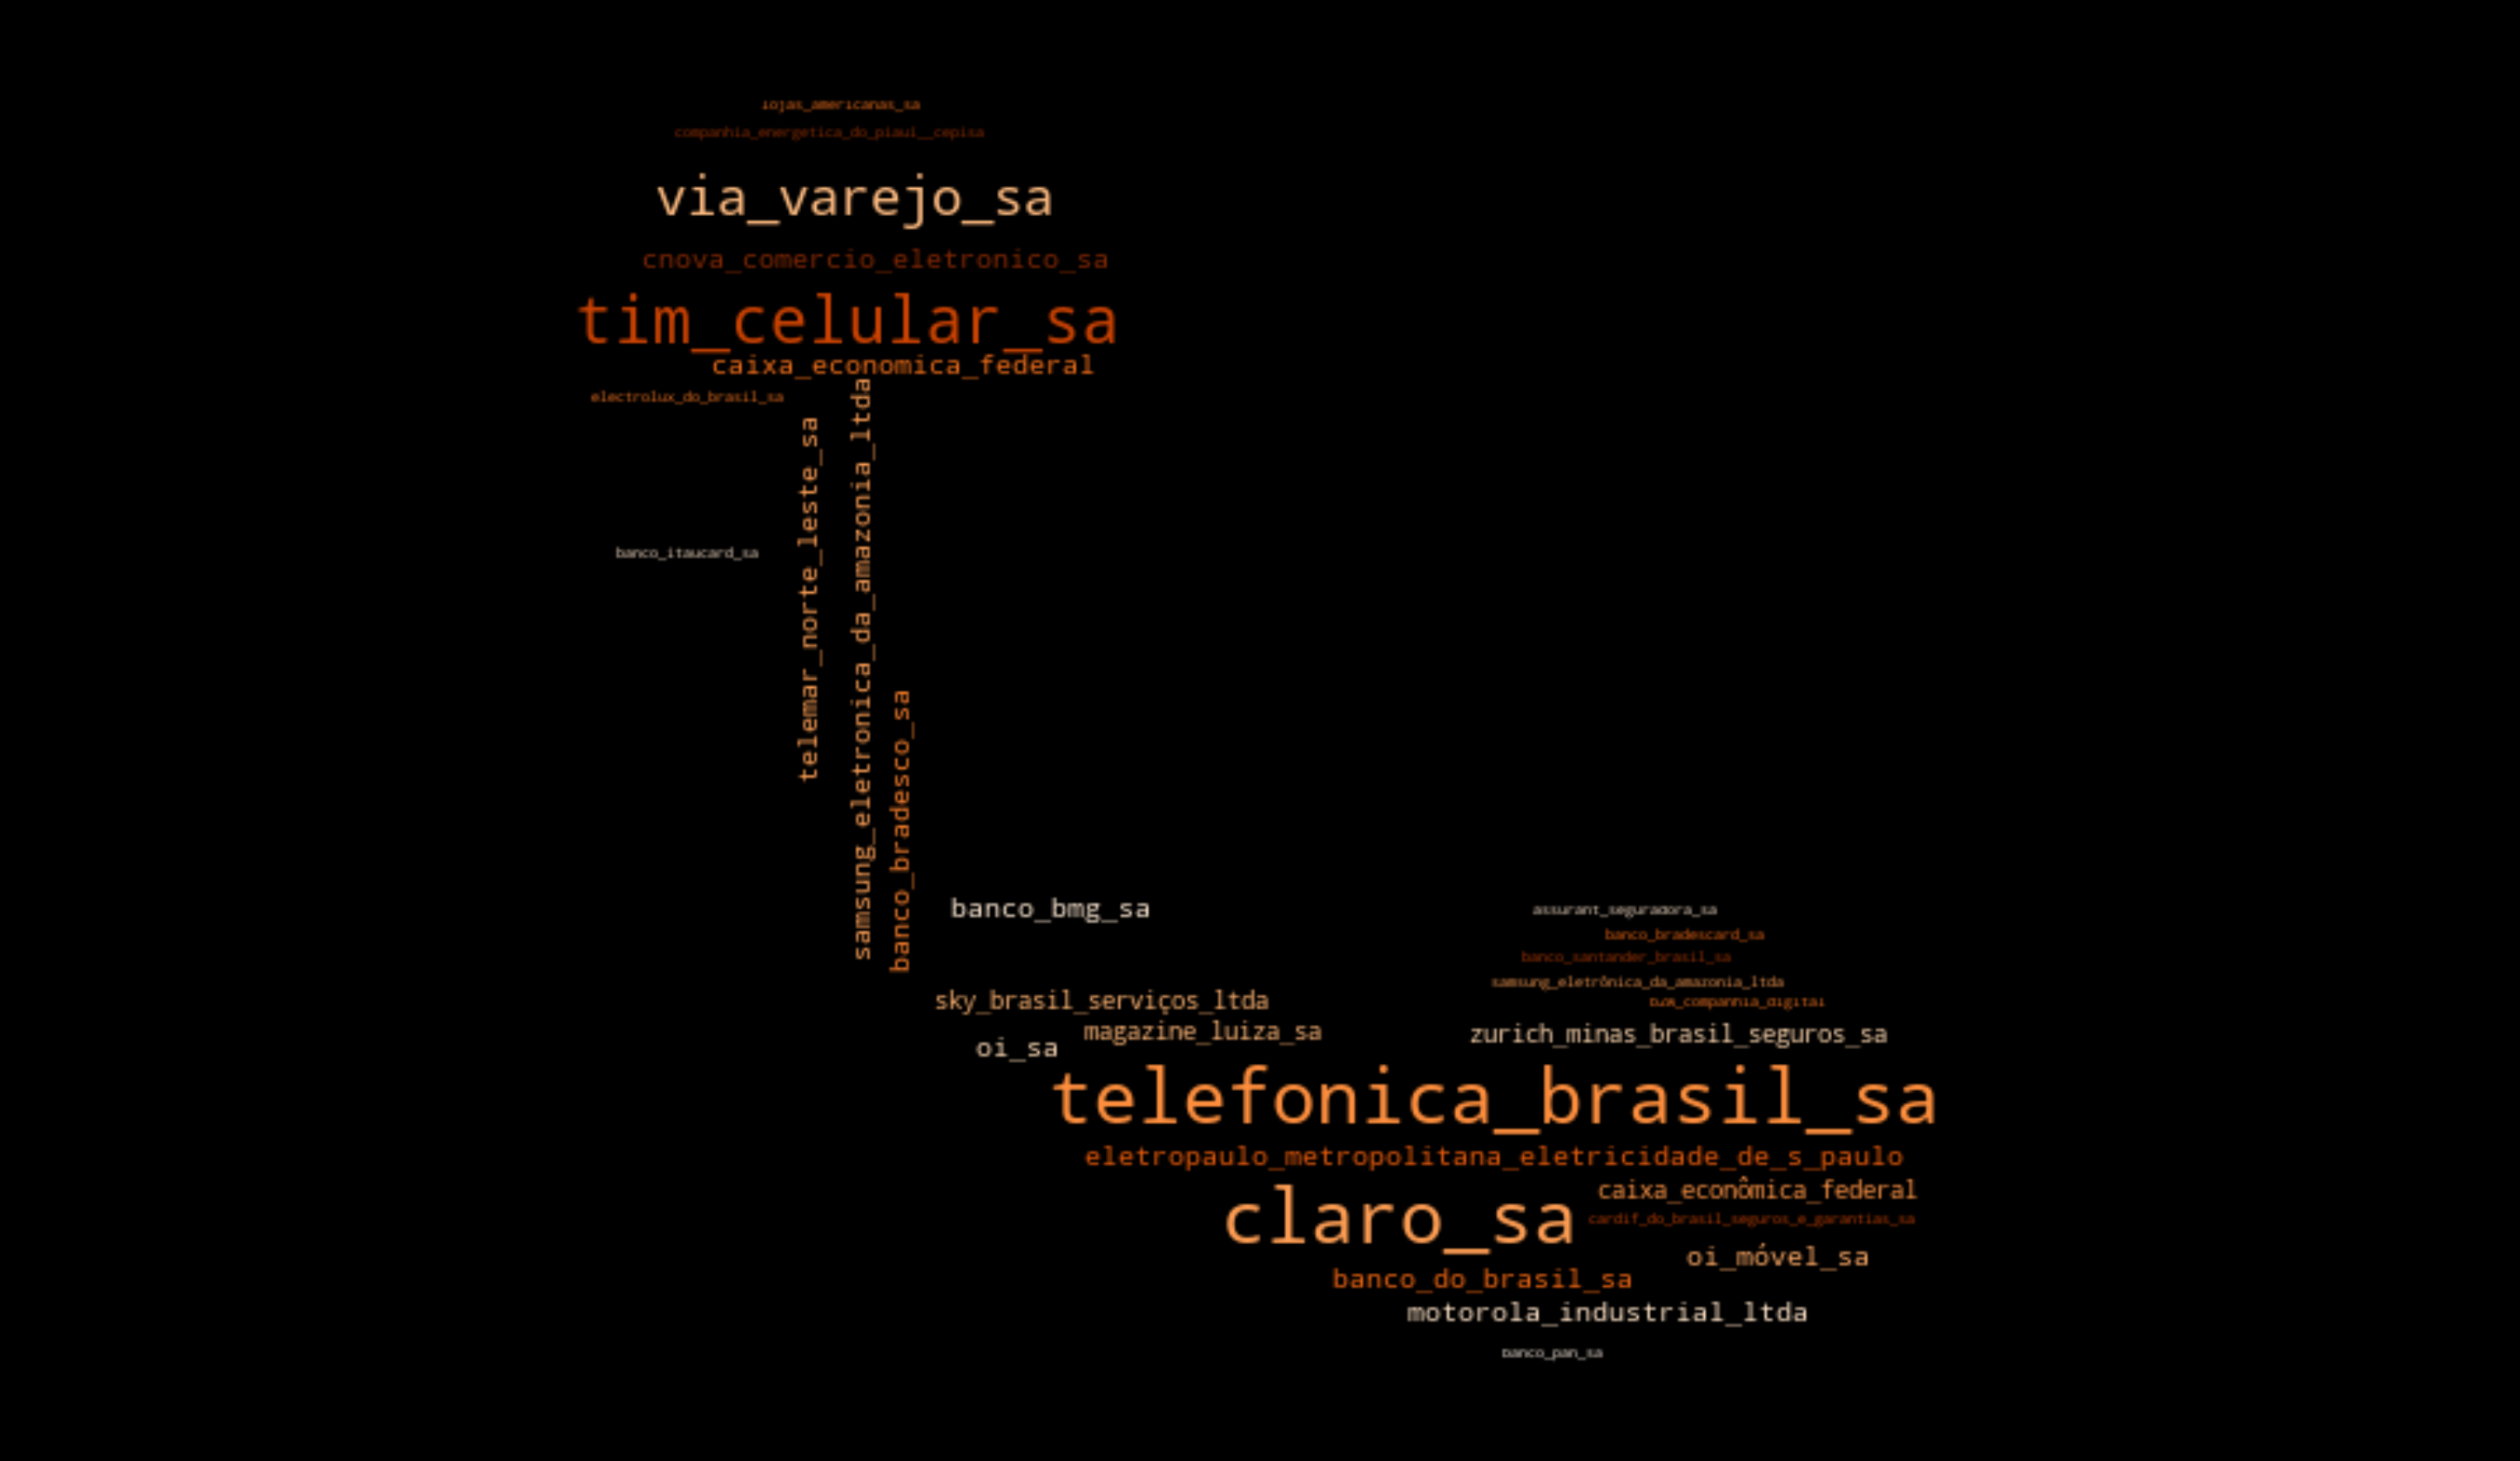

In [32]:
empresa_mask = np.array(Image.open("phone.jpg"))

wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=30,
                              mask = empresa_mask
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud.png")
plt.show()

Wordcloud de Estados

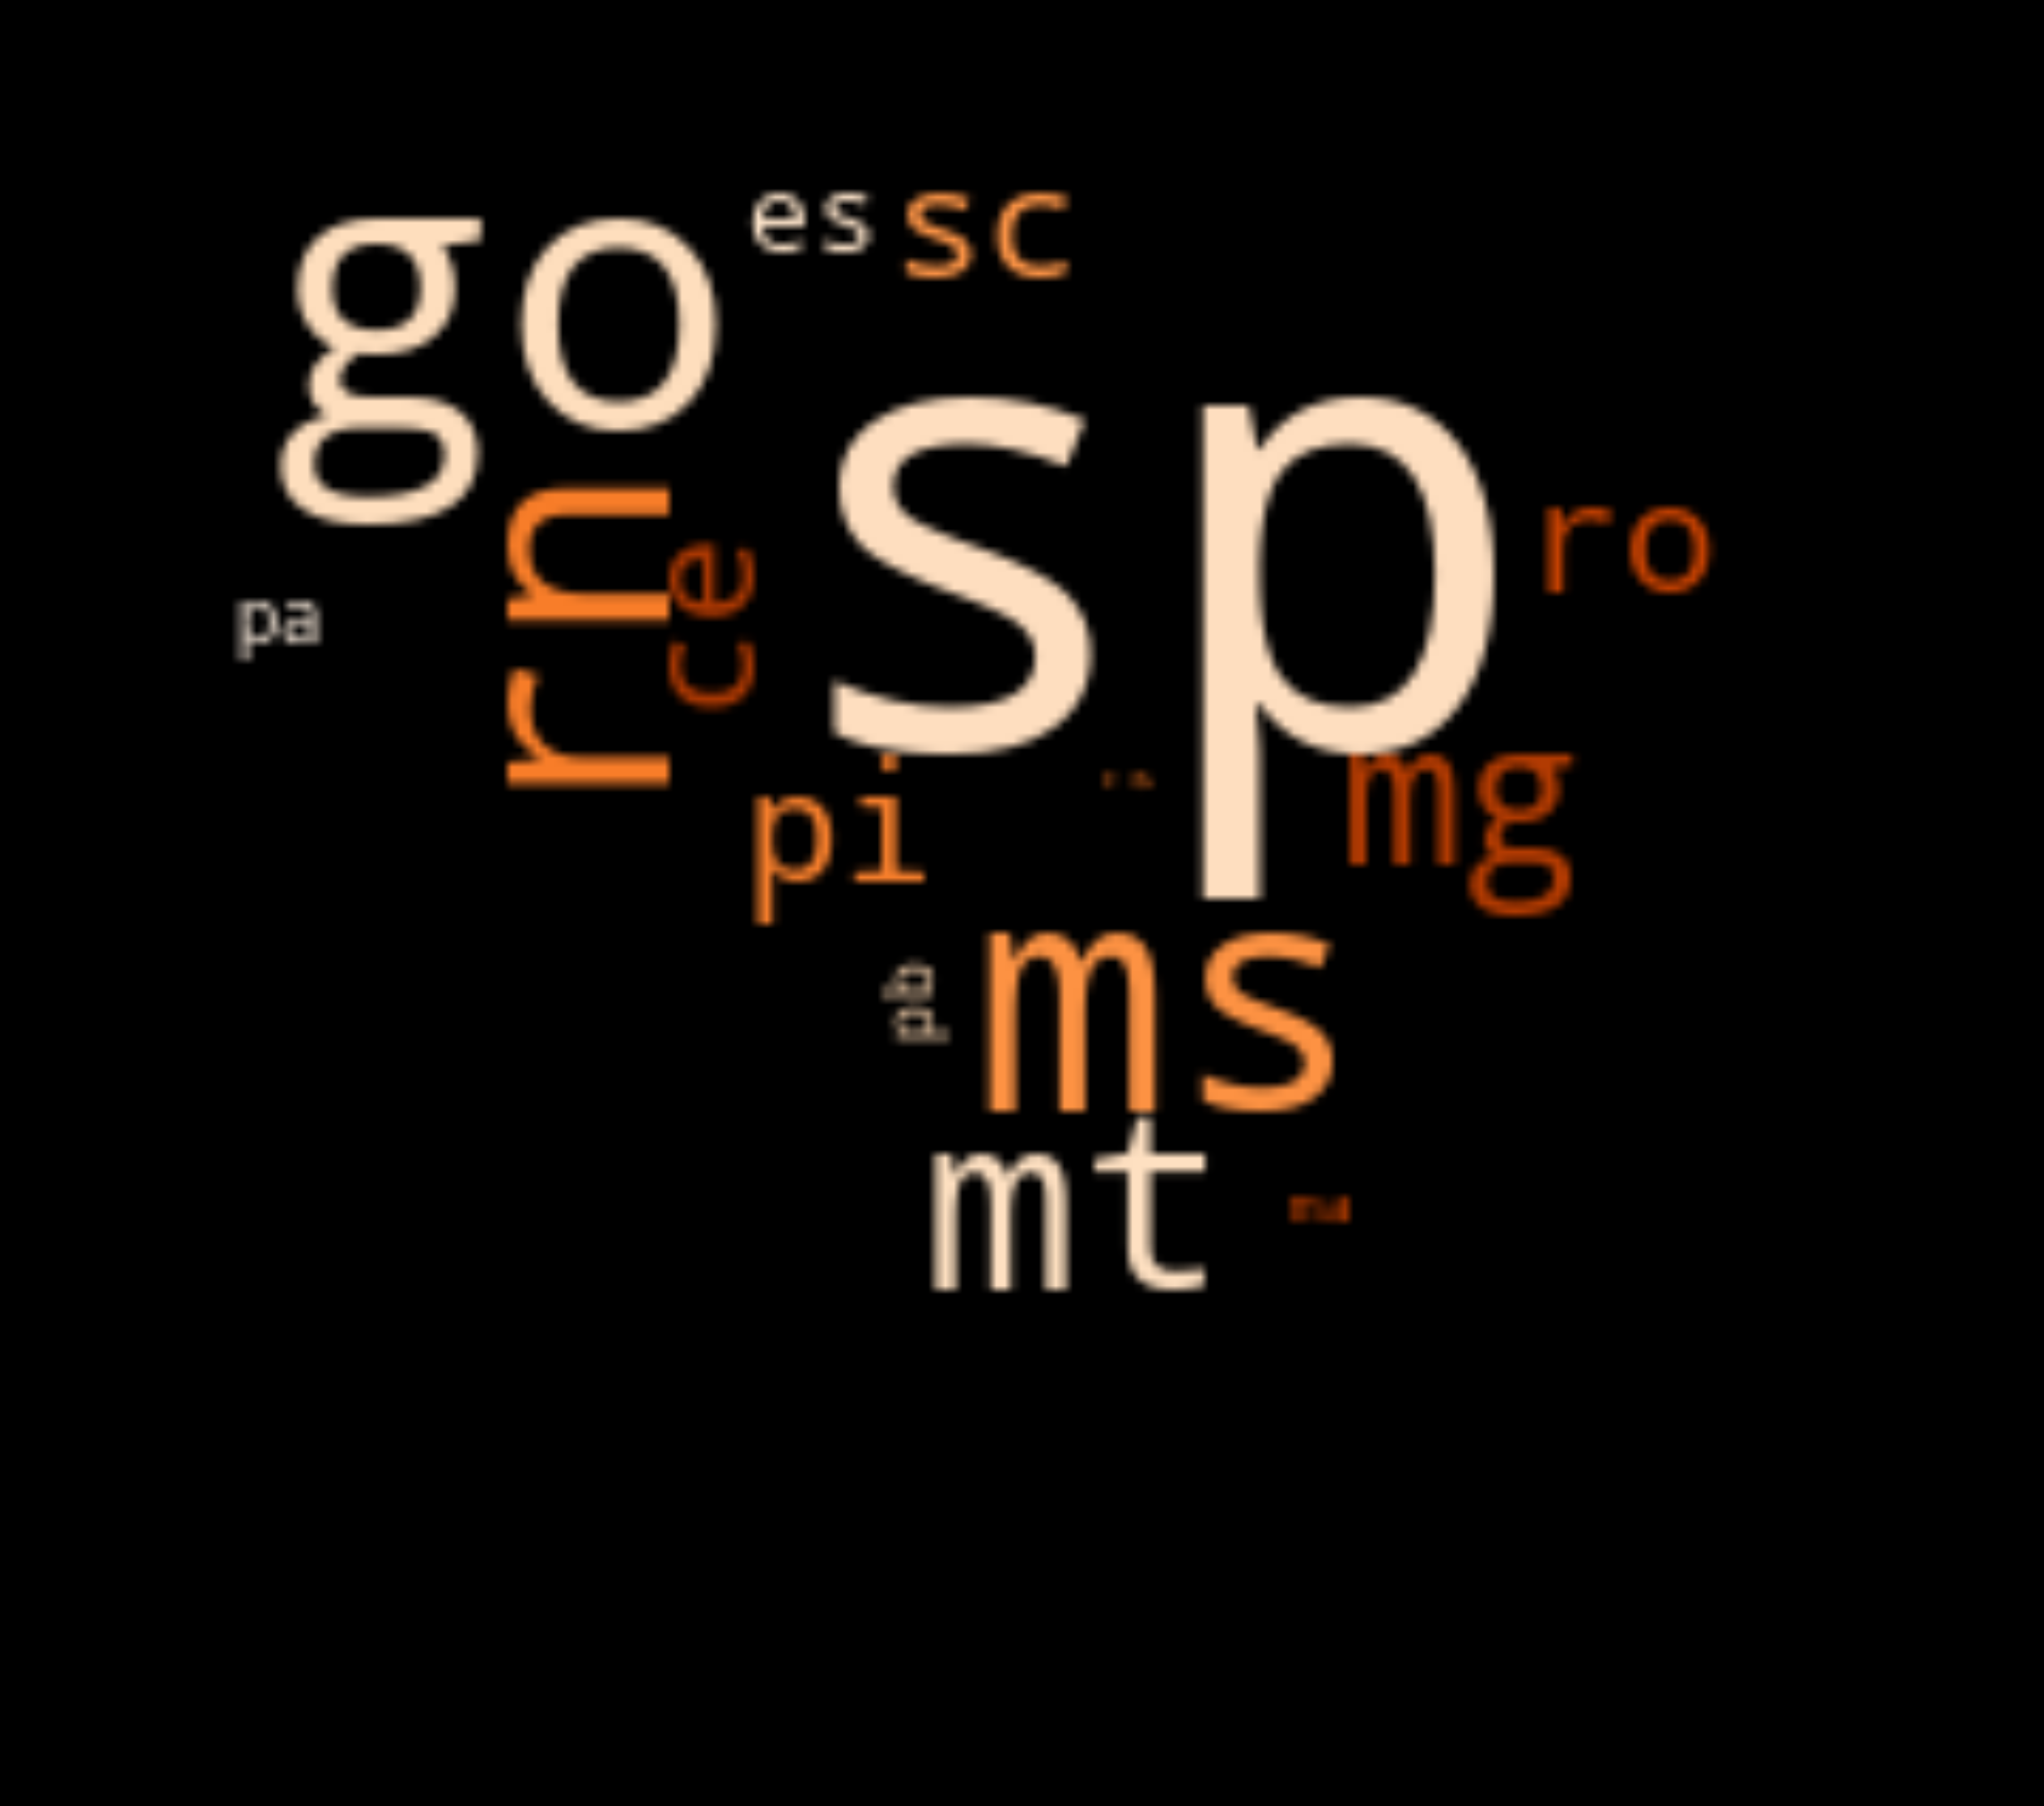

In [28]:
estado_mask = np.array(Image.open("brazil.jpg"))

wordcloud_estados = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              mask = estado_mask,
                              max_font_size=1000).generate(string_estados)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_estados, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Estado_wordcloud.png")
plt.show()

Wordcloud de Serviços



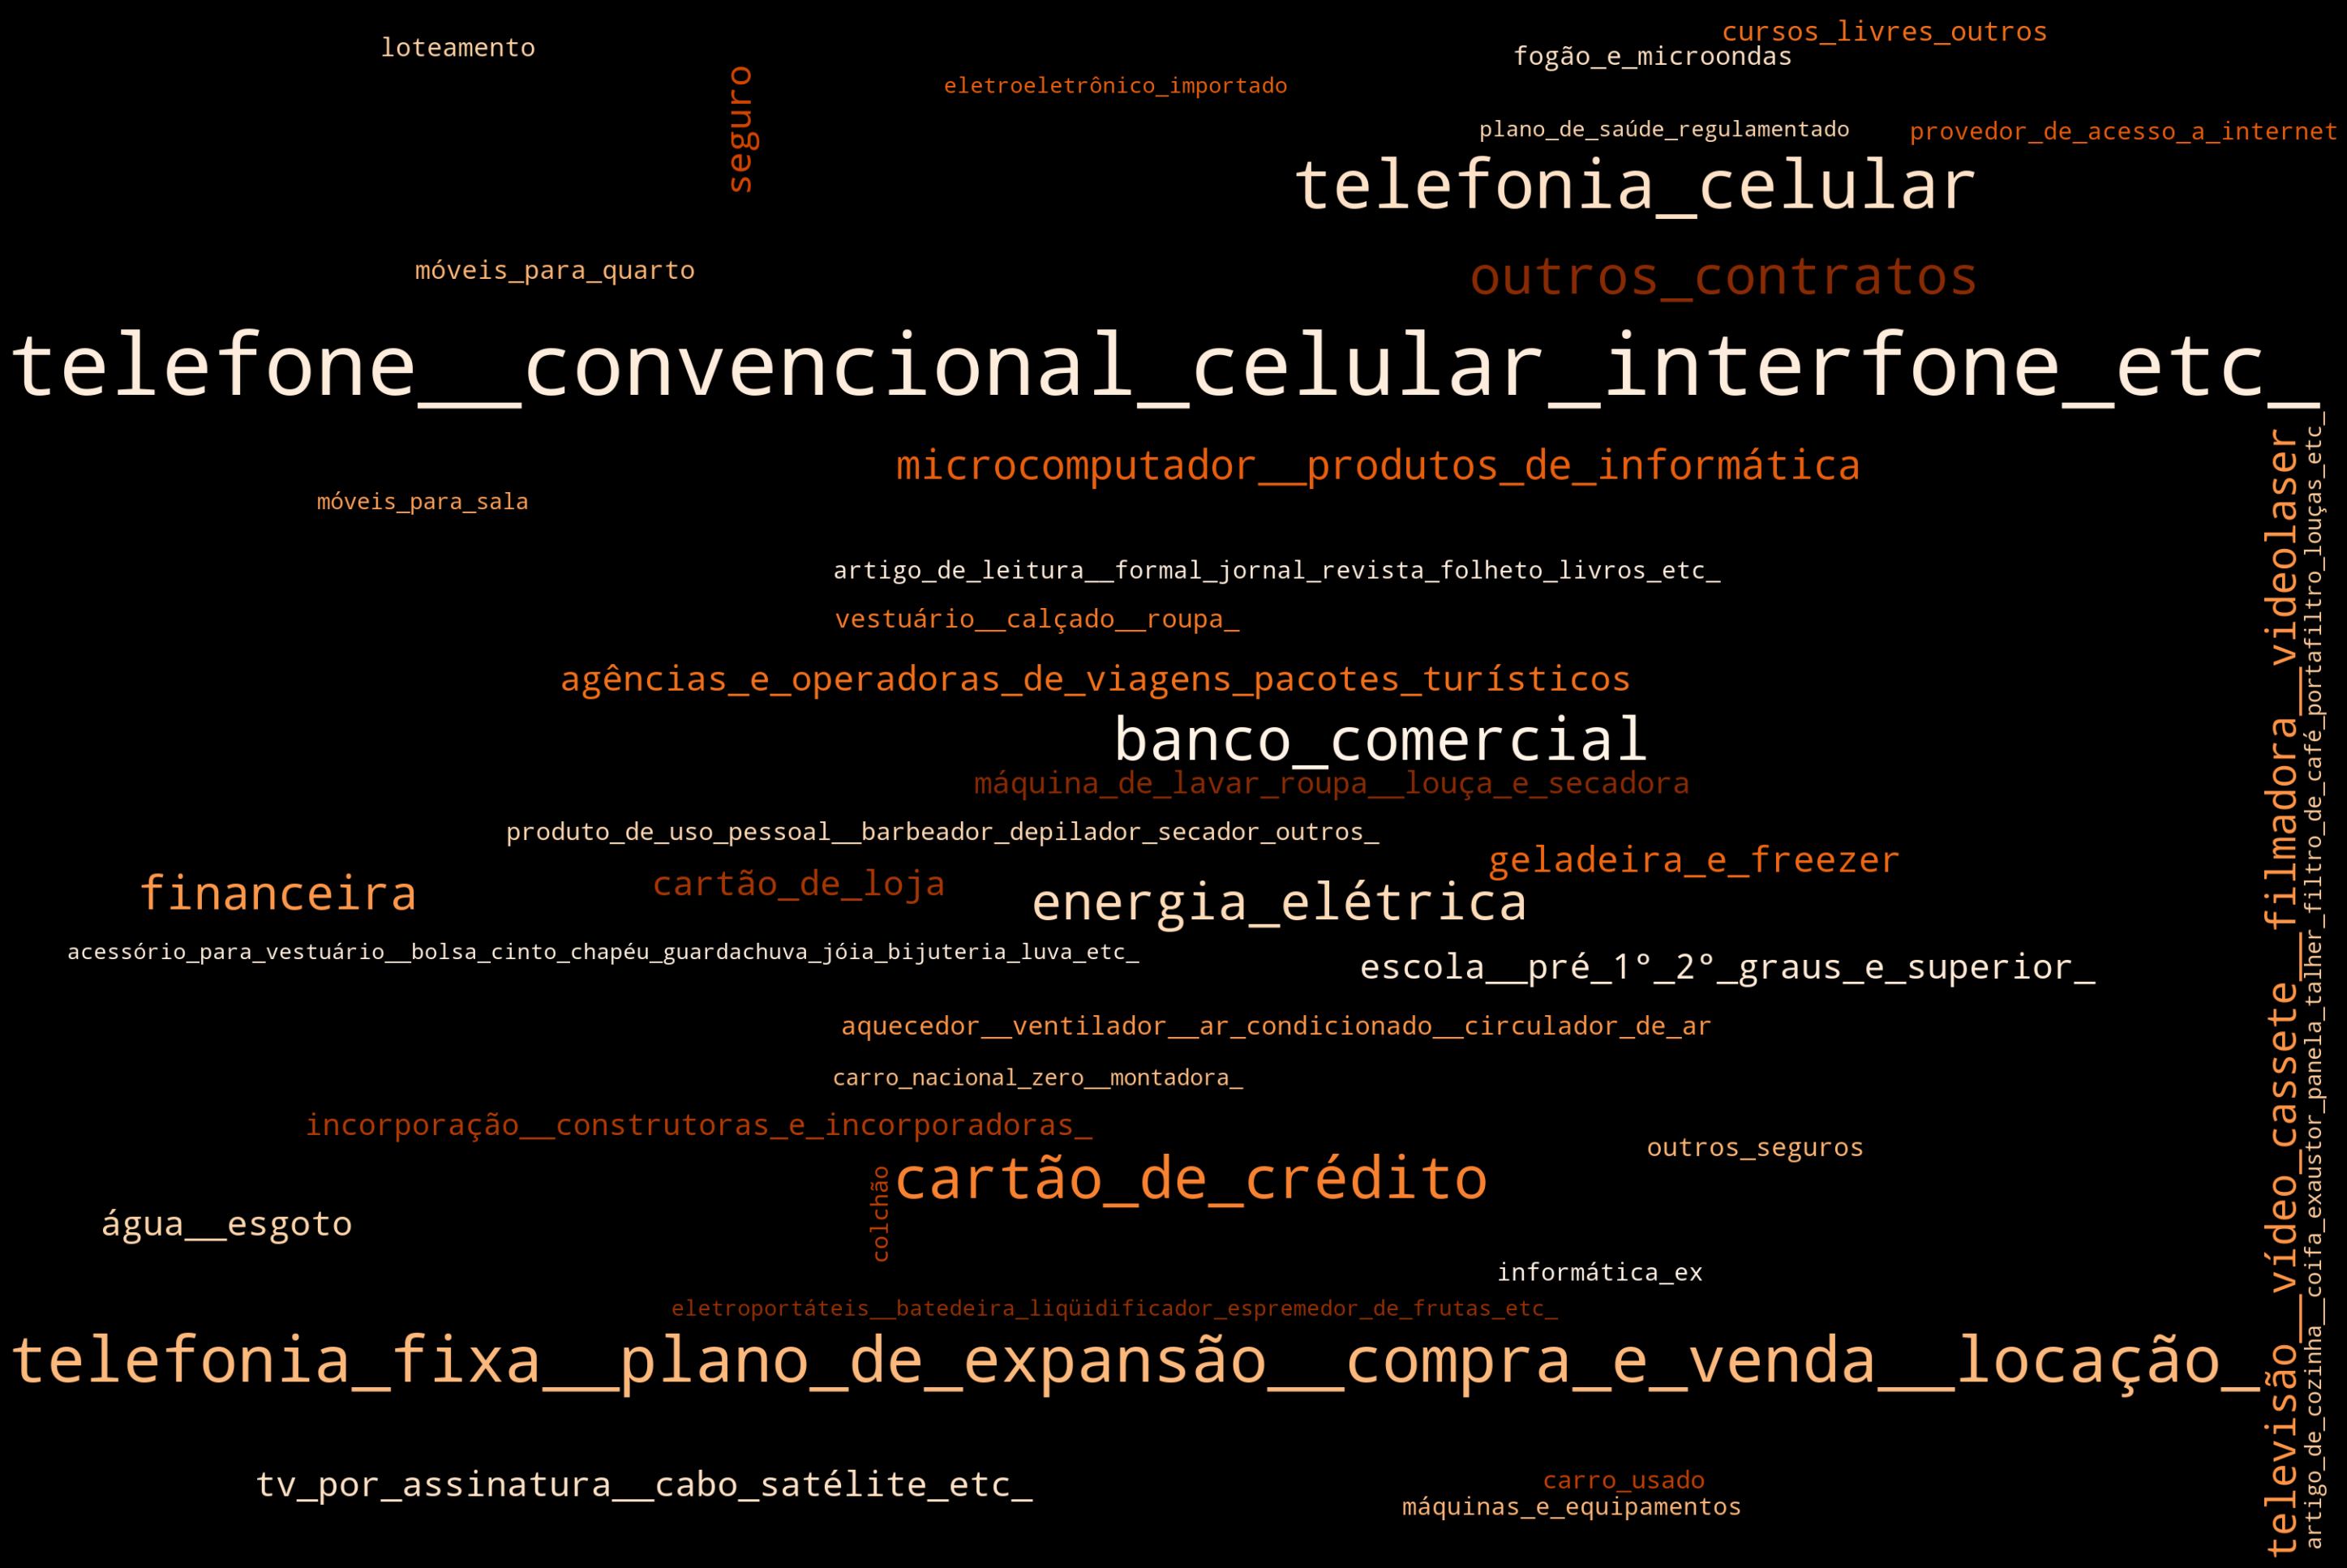

In [30]:
wordcloud_servicos = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_servicos)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_servicos, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Serviço_wordcloud.png")
plt.show()

**Conclusão**

Pela análise das wordcloud obtidas, podemos verificar que as empresas com maior registro de reclamações são Telefônica Brasil SA e Claro SA. Quando se faz a análise por serviço, vemos que as maiores reclamações são relacionadas à área de telefonia, o que vai ao encontro da análise realizada por empresa. Com relação à reclamação por estados, temos São Paulo e Goiás com o maior quantitativo de reclamações.